In [1]:
from statistics import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


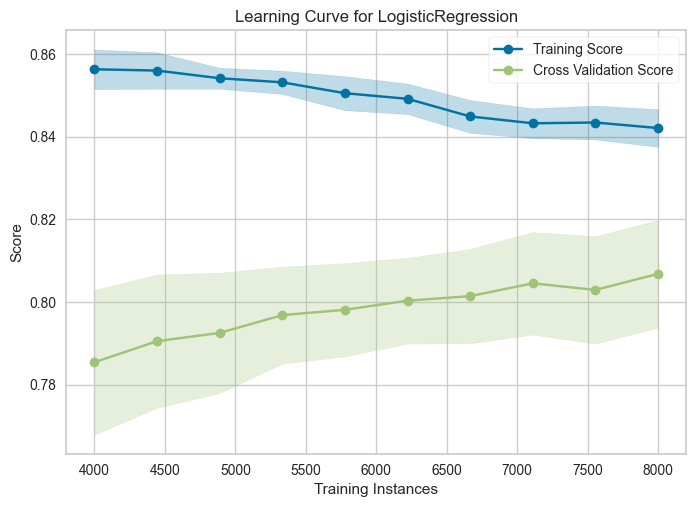

In [4]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [5]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


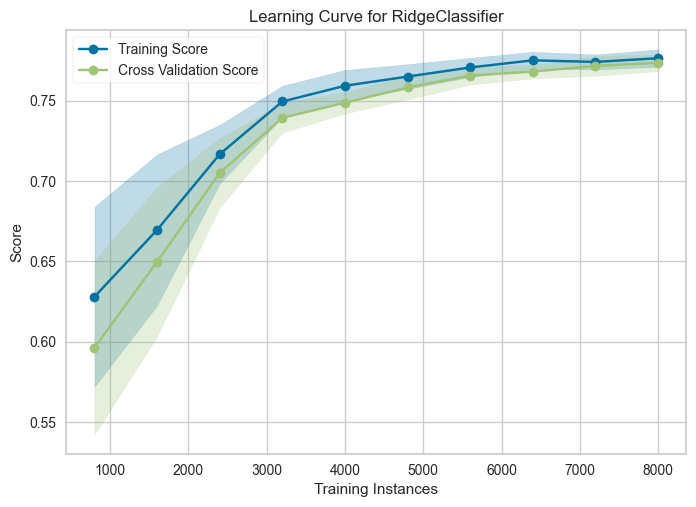

In [6]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

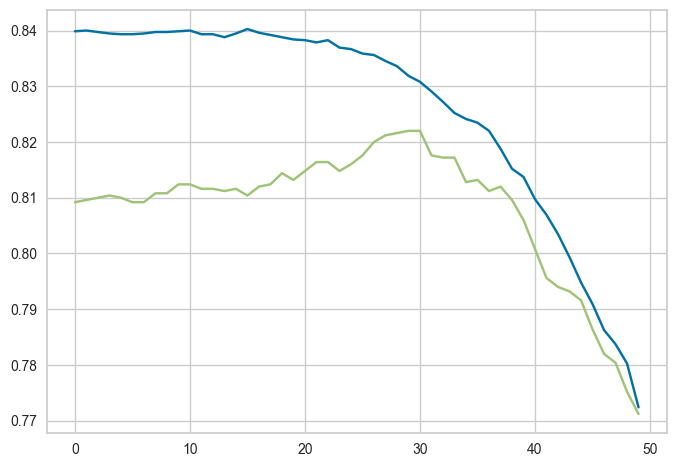

In [7]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [8]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


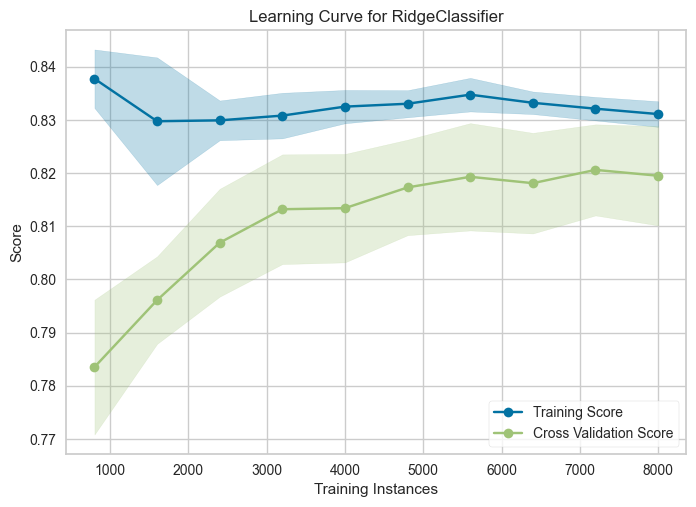

In [9]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [10]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/datatweets/tutorials/refs/heads/main/misc/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression().fit(X_train, y_train)
print(f"Train R²: {lr_reg.score(X_train, y_train):.4f}")
print(f"Test  R²: {lr_reg.score(X_test, y_test):.4f}")

Train R²: 0.9521
Test  R²: 0.6075


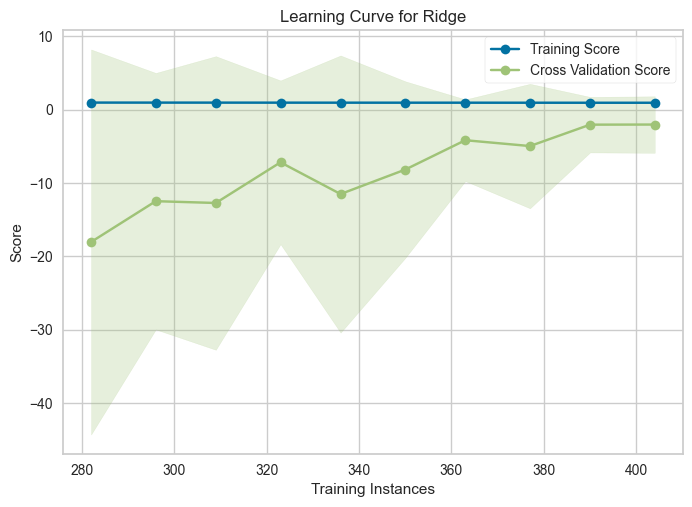

In [12]:
from sklearn.linear_model import Ridge
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show() 

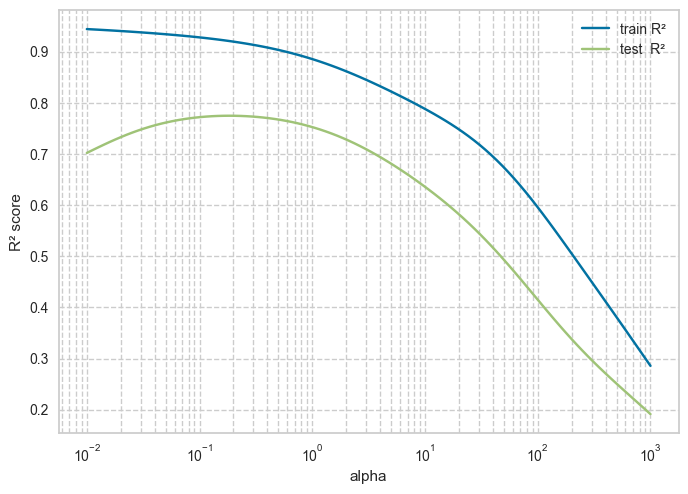

In [13]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-2, 3, 100)
trains = []
tests = []

for alpha in alphas:
    model = Ridge(alpha=alpha).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test,  y_test))

plt.semilogx(alphas, trains, label="train R²")
plt.semilogx(alphas, tests,  label="test  R²")
plt.xlabel("alpha")
plt.ylabel("R² score")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [14]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


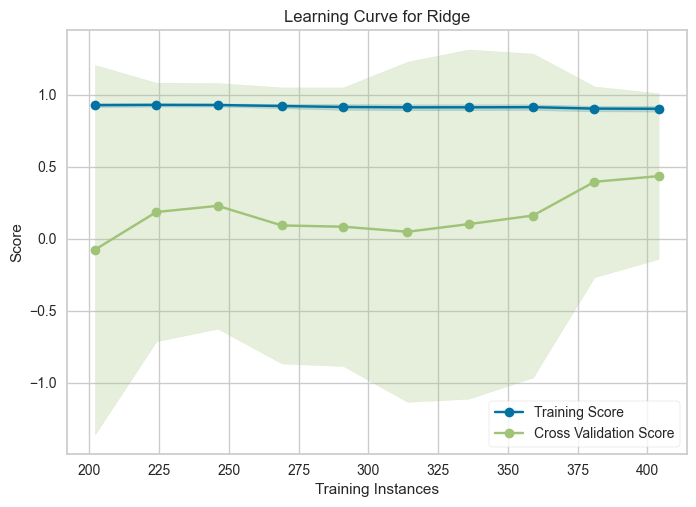

In [15]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

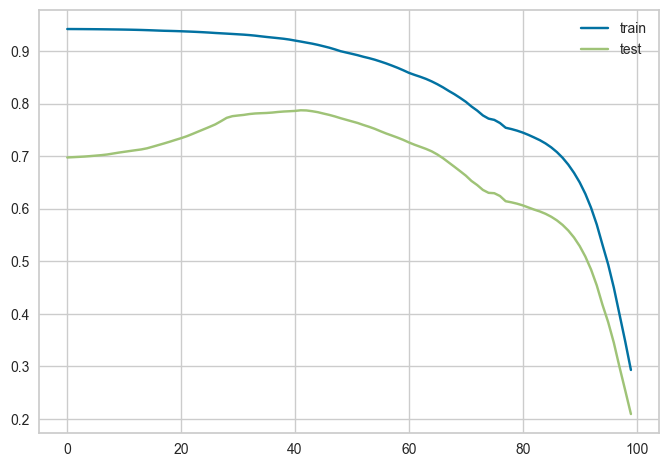

In [16]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [17]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


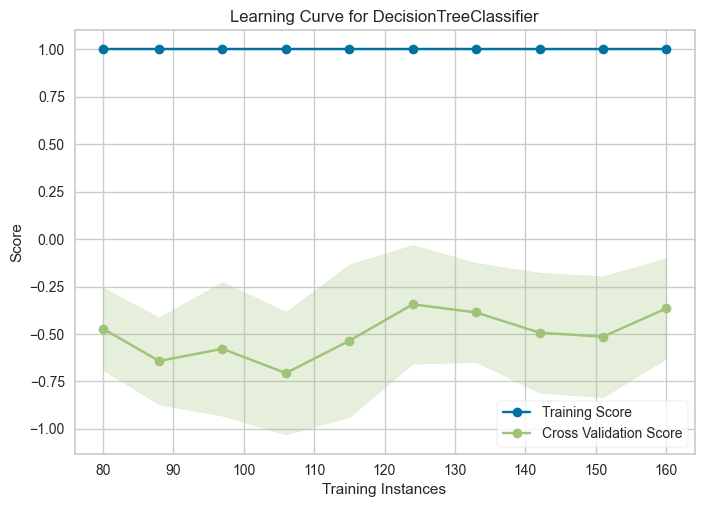

In [20]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

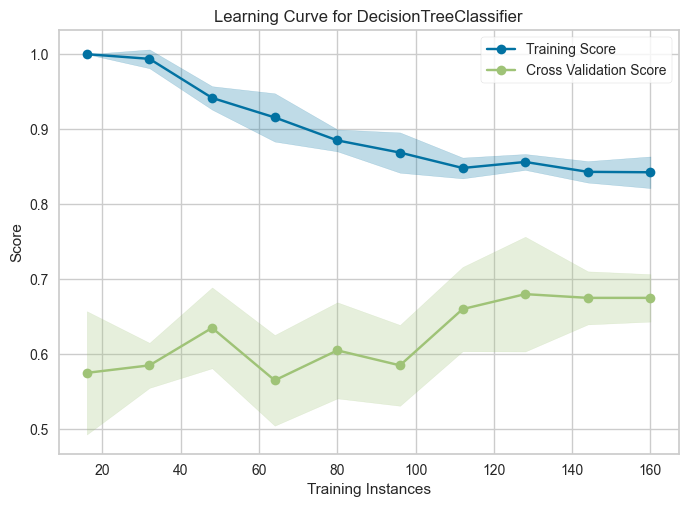

In [21]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

In [22]:
model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8500
Test score = 0.6500


In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [24]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [25]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


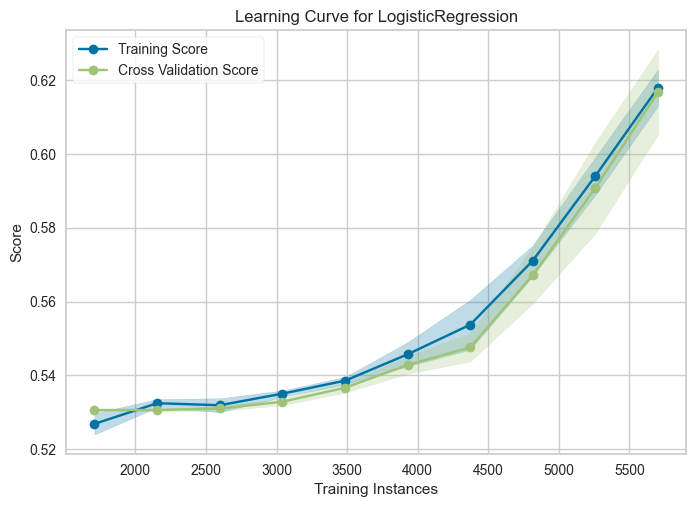

In [27]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [28]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=500).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9388
Test score = 0.9397


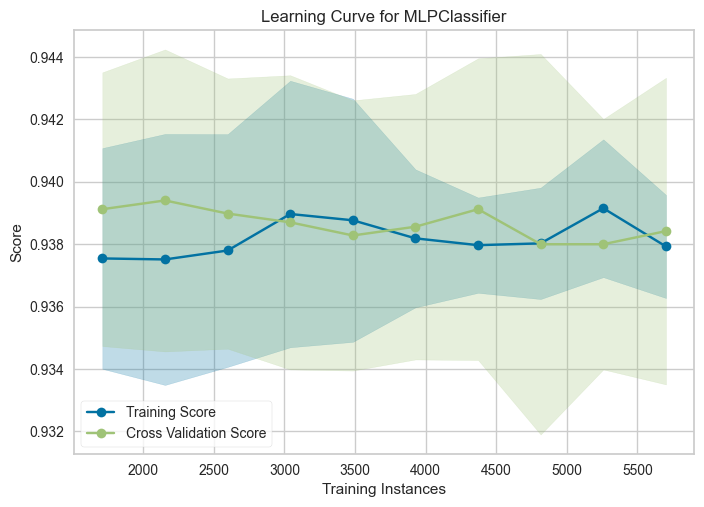

In [29]:
visualizer = LearningCurve(
    MLPClassifier(max_iter=500), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show() 

In [30]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


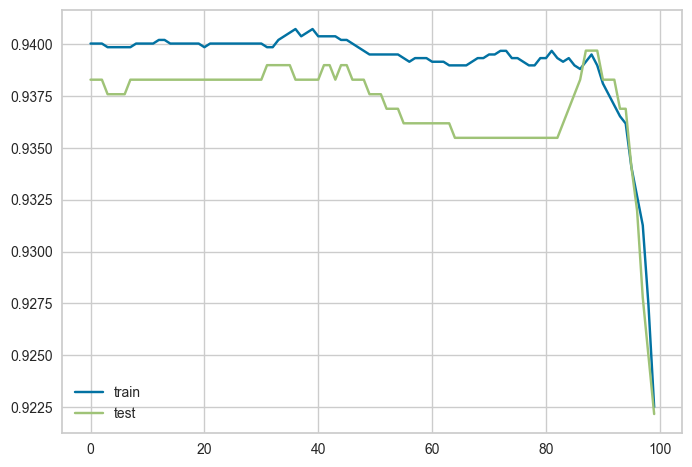

In [31]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [1]:
# Сводка лабе

# В лабораторной работе мы анализировали данные для создания и оценки моделей машинного обучения, решающих задачи классификации и регрессии.
# 
# Сначала мы исследовали данные, обработали их, проверив на пропущенные значения, и разделили на обучающую и тестовую выборки. Затем обучили несколько моделей, включая дерево решений, и оценили их с помощью метрики F1.
# 
# Метрика F1 показывает баланс между точностью и полнотой модели, комбинируя их в одно значение. Она используется для оценки качества классификации, особенно когда данные несбалансированы. F1-скор близок к 1, если модель работает хорошо, и к 0, если плохо
# 
# Обнаружив проблему переобучения, мы применили регуляризацию для улучшения модели.Это техника, которая помогает уменьшить сложность модели, чтобы она не "запоминала" слишком много ненужных деталей в данных. Мы применили два типа регуляризации:
# L1 (Lasso) — убирает неважные признаки, делая модель проще.
# L2 (Ridge) — ограничивает слишком большие веса признаков, чтобы модель не полагалась на отдельные данные.
# Также использовали ElasticNet, который сочетает L1 и L2 для лучшего результата. Это улучшило точность модели на новых данных
# 
# 
# Также использовали кросс-валидацию для проверки стабильности и улучшения результатов.
# Кросс-валидация — это метод, который помогает проверить, насколько хорошо модель будет работать на новых данных, избегая переобучения.
# Процесс выглядит так:
# 1)Данные делятся на несколько частей (например, на 5 или 10).
# 2)Модель обучается на всех частях данных, кроме одной, и проверяется на этой одной части (это называется фолдом).
# 3)Этот процесс повторяется несколько раз, каждый раз оставляя для проверки новую часть данных.
# 4)В конце вычисляется средний результат по всем проверкам.
# Так мы получаем более стабильную оценку, которая показывает, как модель будет вести себя на реальных, не виденных данных, а не просто на обучающем наборе
# 
# 
# Протестировали другие алгоритмы, такие как SVM и KNN, с разными параметрами. Для оценки эффективности моделей использовали метрику MSE и экспериментировали с различными методами регуляризации, чтобы улучшить качество предсказаний.

In [ ]:
# 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [32]:
from sklearn.metrics import classification_report

# Генерация синтетических данных
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Предсказание и отчёт
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [ ]:
# 2. Повторите диагностику модели регрессии с использованием других видов моделей:
# метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
# метода ближайших соседей (исследуйте влияние количества соседей)
# метода решающих деревьев (гиперпараметры по вашему выбору)

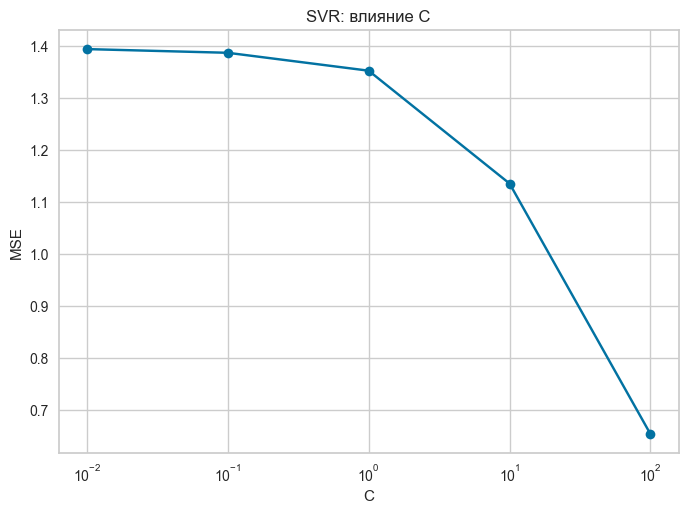

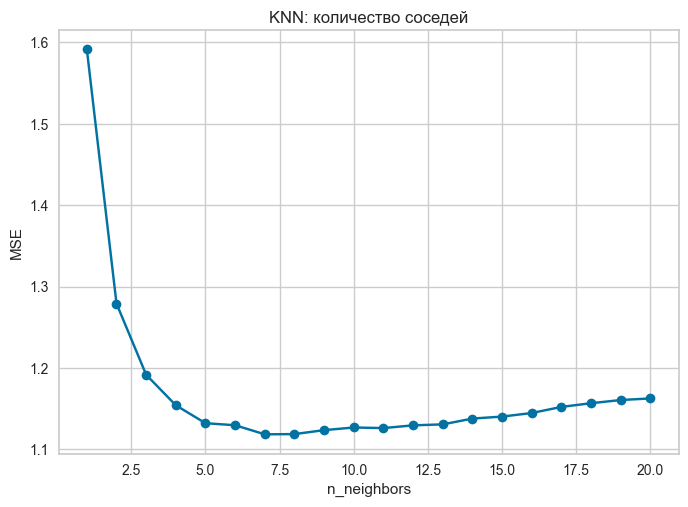

Decision Tree MSE: 0.526799989691142


In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Датасет
X, y = fetch_california_housing(return_X_y=True)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM: исследуем C
svr_errors = []
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    model = SVR(C=C)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    svr_errors.append(mean_squared_error(y_test, pred))

plt.plot(C_values, svr_errors, marker='o')
plt.xscale('log')
plt.title('SVR: влияние C')
plt.xlabel('C')
plt.ylabel('MSE')
plt.show()

# KNN: влияние количества соседей
knn_errors = []
neighbors = range(1, 21)
for k in neighbors:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    knn_errors.append(mean_squared_error(y_test, pred))

plt.plot(neighbors, knn_errors, marker='o')
plt.title('KNN: количество соседей')
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.show()

# Decision Tree: базовая модель
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))


In [ ]:
# 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

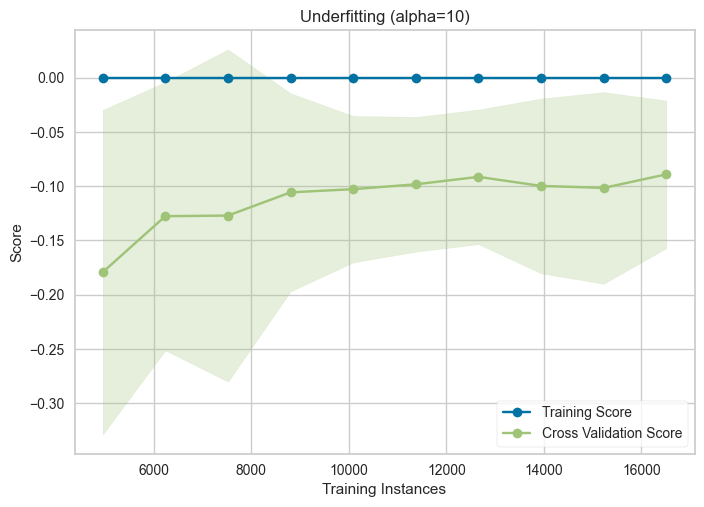

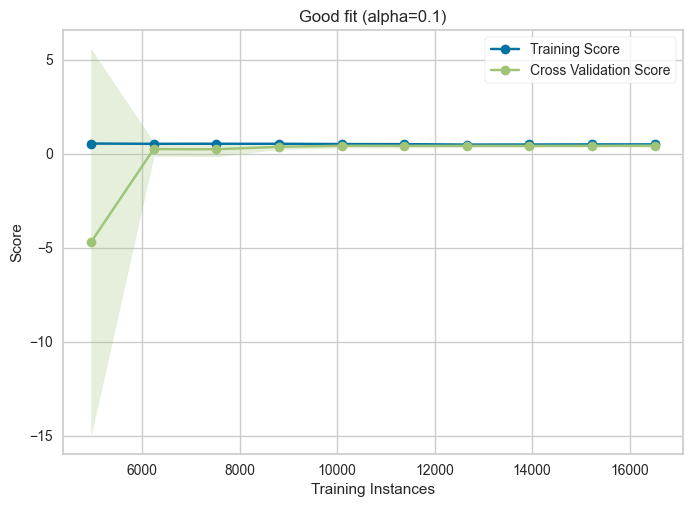

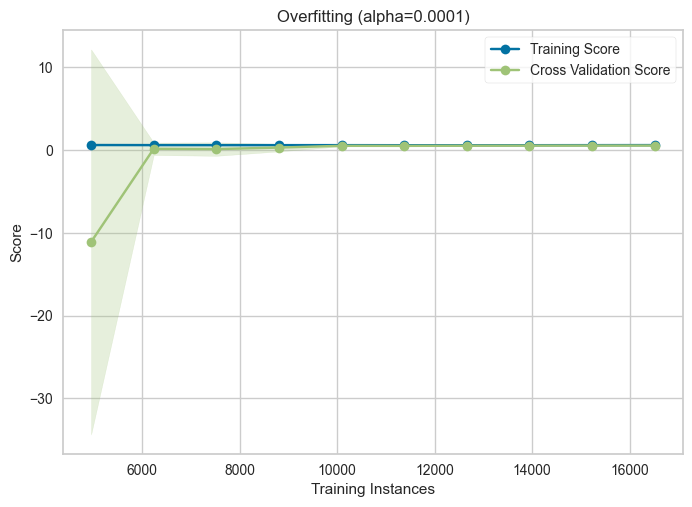

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import LearningCurve
import numpy as np

# Загрузка данных
X, y = fetch_california_housing(return_X_y=True)

# Масштабирование + модель в пайплайне
def lasso_model(alpha):
    return make_pipeline(
        StandardScaler(),
        Lasso(alpha=alpha, max_iter=10000)
    )

# Построение трёх моделей:
# 1. Недообученная (alpha слишком большой)
# 2. Качественная (alpha подобран)
# 3. Переобученная (alpha слишком маленький)

alphas = {
    "Underfitting (alpha=10)": 10,
    "Good fit (alpha=0.1)": 0.1,
    "Overfitting (alpha=0.0001)": 0.0001,
}

for label, alpha in alphas.items():
    visualizer = LearningCurve(
        lasso_model(alpha),
        scoring='r2',
        train_sizes=np.linspace(0.3, 1.0, 10),
        title=label
    ).fit(X, y).show()



In [36]:
from sklearn.model_selection import GridSearchCV

params = {'lasso__alpha': np.logspace(-4, 2, 30)}
pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000))
grid = GridSearchCV(pipeline, params, cv=5, scoring='r2')
grid.fit(X, y)

print("Оптимальный alpha:", grid.best_params_['lasso__alpha'])
print("R^2 на валидации:", grid.best_score_)


Оптимальный alpha: 0.0006723357536499335
R^2 на валидации: 0.5530478219579166


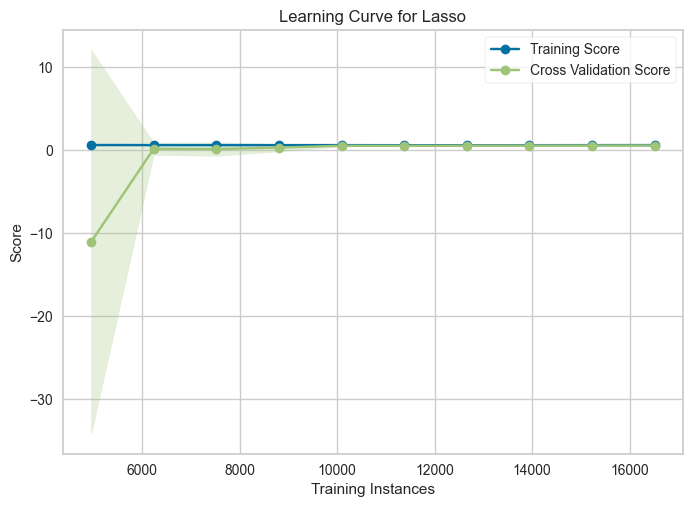

In [37]:
visualizer = LearningCurve(
        lasso_model(0.000672),
        scoring='r2',
        train_sizes=np.linspace(0.3, 1.0, 10)
    ).fit(X, y).show()